### Load Data

In [94]:
import pandas as pd

In [95]:
data = pd.read_csv('sample_data/sample_data_c.csv')

In [96]:
data.head()

,Unnamed: 0,docid,stock_code,author,headline,content,clean_content,label
0,0,2.020000e+14,600340.sh,狼子會投,36元成本，七萬股，目標價50元,"<html>\n <meta http-equiv=""Content-Type"" conte...",36元成本，七萬股，目標價50元36元成本，七萬股，目標價50元36元成本，七萬股，目標價50元,1
1,1,2.020000e+14,600340.sh,整齊皓月,華夏幸福36幹進來的，幾乎滿倉了，後市如何？下周要撤不？,"<html>\n <meta http-equiv=""Content-Type"" conte...",華夏幸福36幹進來的，幾乎滿倉了，後市如何？下周要撤不？華夏幸福36幹進來的，幾乎滿倉了，後...,1
2,2,2.020000e+14,600340.sh,思理紅嫩,華夏幸福36幹進來的，幾乎滿倉了，後市如何，大神指點下？,"<html>\n <meta http-equiv=""Content-Type"" conte...",華夏幸福36幹進來的，幾乎滿倉了，後市如何，大神指點下？華夏幸福36幹進來的，幾乎滿倉了，後...,1
3,3,2.020000e+14,600211.sh,再見理想123,從集中持股到資產配置，可這樣走,"<html>\n <meta http-equiv=""Content-Type"" conte...",從集中持股到資產配置，可這樣走從集中持股到資產配置，可這樣走周四大幅下殺是否另有玄機，周五又...,0
4,4,2.020000e+14,002718.sz,genglp,上市公司當下賣房屬於,"<html>\n <meta http-equiv=""Content-Type"" conte...",上市公司當下賣房屬於上市公司當下賣房屬於一是基於但由於業績下滑,0


### Filtering

##### Skipped due to data cleansing in precvious work

### Sentiment Analysis

In [97]:
from textblob import TextBlob

In [98]:
data['clean_content'][3]

'從集中持股到資產配置，可這樣走從集中持股到資產配置，可這樣走周四大幅下殺是否另有玄機，周五又當如何立足！'

In [99]:
TextBlob(str(data['clean_content'][100])).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [100]:
from os import listdir
from os.path import isfile, join
import jieba
import codecs
from langconv import * # convert Traditional Chinese characters to Simplified Chinese characters
import pickle
import random
import numpy as np

from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.preprocessing.text import Tokenizer
from keras.layers.core import Dense
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard


In [101]:
line = "籃球"
print(line)

line = Converter('zh-hans').convert(line)
print(line)


籃球
篮球


In [102]:
file = pd.DataFrame
file = data['clean_content']
file.head()

0     36元成本，七萬股，目標價50元36元成本，七萬股，目標價50元36元成本，七萬股，目標價50元
1    華夏幸福36幹進來的，幾乎滿倉了，後市如何？下周要撤不？華夏幸福36幹進來的，幾乎滿倉了，後...
2    華夏幸福36幹進來的，幾乎滿倉了，後市如何，大神指點下？華夏幸福36幹進來的，幾乎滿倉了，後...
3    從集中持股到資產配置，可這樣走從集中持股到資產配置，可這樣走周四大幅下殺是否另有玄機，周五又...
4                      上市公司當下賣房屬於上市公司當下賣房屬於一是基於但由於業績下滑
Name: clean_content, dtype: object

In [103]:
for i in range(len(file)):
    file[i] =  Converter('zh-hans').convert(str(file[i]))

C:\Users\Sean\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
file.head()

0     36元成本，七万股，目标价50元36元成本，七万股，目标价50元36元成本，七万股，目标价50元
1    华夏幸福36干进来的，几乎满仓了，后市如何？下周要撤不？华夏幸福36干进来的，几乎满仓了，后...
2    华夏幸福36干进来的，几乎满仓了，后市如何，大神指点下？华夏幸福36干进来的，几乎满仓了，后...
3    从集中持股到资产配置，可这样走从集中持股到资产配置，可这样走周四大幅下杀是否另有玄机，周五又...
4                      上市公司当下卖房属于上市公司当下卖房属于一是基于但由于业绩下滑
Name: clean_content, dtype: object

In [105]:
def __pickleStuff(filename, stuff):
    save_stuff = open(filename, "wb")
    pickle.dump(stuff, save_stuff)
    save_stuff.close()
def __loadStuff(filename):
    saved_stuff = open(filename,"rb")
    stuff = pickle.load(saved_stuff)
    saved_stuff.close()
    return stuff

In [106]:
filename = file[0]
text= filename
text = text.replace("\n", "")
text = text.replace("\r", "")
print("==Orginal==:\n\r{}".format(text))
    
stopwords = [ line.rstrip() for line in codecs.open('./sample_data/chinese_stop_words.txt',"r", encoding="utf-8") ]
seg_list = jieba.cut(text, cut_all=False)
final =[]
seg_list = list(seg_list)
for seg in seg_list:
    if seg not in stopwords:
        final.append(seg)
print("==Tokenized==\tToken count:{}\n\r{}".format(len(seg_list)," ".join(seg_list)))
print("==Stop Words Removed==\tToken count:{}\n\r{}".format(len(final)," ".join(final)))

==Orginal==:
36元成本，七万股，目标价50元36元成本，七万股，目标价50元36元成本，七万股，目标价50元
==Tokenized==	Token count:30
36 元 成本 ， 七 万股 ， 目标价 50 元 36 元 成本 ， 七 万股 ， 目标价 50 元 36 元 成本 ， 七 万股 ， 目标价 50 元
==Stop Words Removed==	Token count:21
36 元 成本 万股 目标价 50 元 36 元 成本 万股 目标价 50 元 36 元 成本 万股 目标价 50 元


In [107]:
documents = []
for i in range(0,1000):
    if data['label'][i] == '2':
#     with codecs.open(filename, "rb") as doc_file:
#         for line in doc_file:
#             try:
#                 line = line.decode("GB2312")
#             except:
#                 continue
        text+=Converter('zh-hans').convert(data['cleaned_content'][i])# Convert from traditional to simplified Chinese

        text = text.replace("\n", "")
        text = text.replace("\r", "")
        documents.append((text, "pos"))

    elif data['label'][i] == '0':
#     with codecs.open(filename, "rb") as doc_file:
#         for line in doc_file:
#             try:
#                 line = line.decode("GB2312")
#             except:
#                 continue
        text+=Converter('zh-hans').convert(data['cleaned_content'][i])# Convert from traditional to simplified Chinese

        text = text.replace("\n", "")
        text = text.replace("\r", "")
        documents.append((text, "neg"))
    
    elif data['label'][i] == '1':
        text+=Converter('zh-hans').convert(data['cleaned_content'][i])# Convert from traditional to simplified Chinese

        text = text.replace("\n", "")
        text = text.replace("\r", "")
        documents.append((text, "neu"))


In [108]:
temp = []
final=[]
for i in range(0,1000):
    seg_list = jieba.cut(file[i], cut_all=False)
    temp =[]
    seg_list = list(seg_list)
    for seg in seg_list:
        if seg not in stopwords:
            temp.append(seg)
    final.append(temp)

Max length is:  1133
80% cover length up to:  31


C:\Users\Sean\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


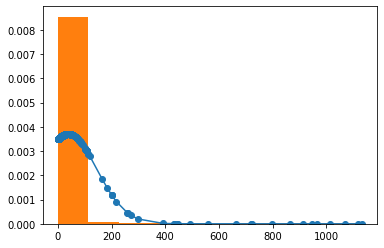

In [137]:
import scipy.stats as stats
import pylab as pl
h = sorted([len(sentence) for sentence in final])
maxLength = h[int(len(h) * 0.80)]
print("Max length is: ",h[len(h)-1])
print("80% cover length up to: ",maxLength)
h = h[:5000]
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')
pl.hist(h,normed=True)      #use this to draw histogram of your data
pl.show() 

In [138]:
wordDict = {}
for sent in final:
    for word in sent:
        wordDict[word] = 1
wordList = list(wordDict.keys())
wordDict = {}
for index, word in enumerate(wordList):
    wordDict[word] = index

In [139]:
oneHotTable = np.zeros(shape=(len(final), len(wordList)))
for index, sent in enumerate(final):
    for word in sent:
        oneHotTable[index][wordDict[word]] = 1
oneHotTable

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [140]:
y = np.array(data["label"])

In [141]:
totalX = [" ".join(wordslist) for wordslist in final]  # Keras Tokenizer expect the words tokens to be seperated by space 
input_tokenizer = Tokenizer(30000) # Initial vocab size
input_tokenizer.fit_on_texts(totalX)
vocab_size = len(input_tokenizer.word_index) + 1
print("input vocab_size:",vocab_size)
totalX = np.array(pad_sequences(input_tokenizer.texts_to_sequences(totalX), maxlen=maxLength))
__pickleStuff("./sample_data/input_tokenizer_chinese.p", input_tokenizer)

input vocab_size: 7530


In [142]:
totalX.shape

(1000, 31)

In [143]:
target_tokenizer = Tokenizer(3)

In [144]:
totalY = to_categorical(y, num_classes=3)

In [145]:
totalY[40:50]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [146]:
output_dimen = totalY.shape[1] # which is 3

In [154]:
sentiment_tag = ['neg','neu','pos'] # either ["neg","pos"] or ["pos","neg"]
metaData = {"maxLength":maxLength,"vocab_size":vocab_size,"output_dimen":output_dimen,"sentiment_tag":sentiment_tag}
__pickleStuff("./sample_data/meta_sentiment_chinese.p", metaData)

In [155]:
embedding_dim = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim,input_length = maxLength))
# Each input would have a size of (maxLength x 256) and each of these 256 sized vectors are fed into the GRU layer one at a time.
# All the intermediate outputs are collected and then passed on to the second GRU layer.
model.add(GRU(256, dropout=0.9, return_sequences=True))
# Using the intermediate outputs, we pass them to another GRU layer and collect the final output only this time
model.add(GRU(256, dropout=0.9))
# The output is then sent to a fully connected layer that would give us our final output_dim classes
model.add(Dense(output_dimen, activation='softmax'))
# We use the adam optimizer instead of standard SGD since it converges much faster
# tbCallBack = TensorBoard(log_dir='./Graph/sentiment_chinese', histogram_freq=0,
#                             write_graph=True, write_images=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(totalX, totalY, validation_split=0.3, batch_size=32, epochs=20, verbose=1, )
model.save('./sample_data/sentiment_chinese_model.HDF5')

print("Saved model!")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 31, 256)           1927680   
_________________________________________________________________
gru_13 (GRU)                 (None, 31, 256)           393984    
_________________________________________________________________
gru_14 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 2,716,419
Trainable params: 2,716,419
Non-trainable params: 0
_________________________________________________________________


C:\Users\Sean\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 [==============================] - 6s 8ms/step - loss: 1.0035 - accuracy: 0.5800 - val_loss: 1.1710 - val_accuracy: 0.3800
Epoch 2/20
700/700 [==============================] - 4s 6ms/step - loss: 0.9321 - accuracy: 0.6171 - val_loss: 1.1868 - val_accuracy: 0.3800
Epoch 3/20
700/700 [==============================] - 4s 6ms/step - loss: 0.9054 - accuracy: 0.6257 - val_loss: 1.2247 - val_accuracy: 0.3800
Epoch 4/20
700/700 [==============================] - 4s 6ms/step - loss: 0.8830 - accuracy: 0.6186 - val_loss: 1.1984 - val_accuracy: 0.3800
Epoch 5/20
700/700 [==============================] - 5s 7ms/step - loss: 0.8650 - accuracy: 0.6271 - val_loss: 1.1708 - val_accuracy: 0.4000
Epoch 6/20
700/700 [==============================] - 5s 7ms/step - loss: 0.7786 - accuracy: 0.6914 - val_loss: 1.2227 - val_accuracy: 0.4000
Epoch 7/20
700/700 [==============================] - 5s 6ms/step - loss: 0.7144 - accuracy: 0.7129 - 

In [156]:
model = None
sentiment_tag = None
maxLength = None
def loadModel():
    global model, sentiment_tag, maxLength
    metaData = __loadStuff("./sample_data/meta_sentiment_chinese.p")
    maxLength = metaData.get("maxLength")
    vocab_size = metaData.get("vocab_size")
    output_dimen = metaData.get("output_dimen")
    sentiment_tag = metaData.get("sentiment_tag")
    embedding_dim = 256
    if model is None:
        model = Sequential()
        model.add(Embedding(vocab_size, embedding_dim, input_length=maxLength))
        # Each input would have a size of (maxLength x 256) and each of these 256 sized vectors are fed into the GRU layer one at a time.
        # All the intermediate outputs are collected and then passed on to the second GRU layer.
        model.add(GRU(256, dropout=0.9, return_sequences=True))
        # Using the intermediate outputs, we pass them to another GRU layer and collect the final output only this time
        model.add(GRU(256, dropout=0.9))
        # The output is then sent to a fully connected layer that would give us our final output_dim classes
        model.add(Dense(output_dimen, activation='softmax'))
        # We use the adam optimizer instead of standard SGD since it converges much faster
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.load_weights('./sample_data/sentiment_chinese_model.HDF5')
        model.summary()
    print("Model weights loaded!")

In [157]:
def findFeatures(text):
    text=Converter('zh-hans').convert(text)
    text = text.replace("\n", "")
    text = text.replace("\r", "") 
    seg_list = jieba.cut(text, cut_all=False)
    seg_list = list(seg_list)
    text = " ".join(seg_list)
    textArray = [text]
    input_tokenizer_load = __loadStuff("./sample_data/input_tokenizer_chinese.p")
    textArray = np.array(pad_sequences(input_tokenizer_load.texts_to_sequences(textArray), maxlen=maxLength))
    return textArray
def predictResult(text):
    if model is None:
        print("Please run \"loadModel\" first.")
        return None
    features = findFeatures(text)
    predicted = model.predict(features)[0] # we have only one sentence to predict, so take index 0
    predicted = np.array(predicted)
    probab = predicted.max()
    predition = sentiment_tag[predicted.argmax()]
    return predition, probab

In [158]:
loadModel()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 31, 256)           1927680   
_________________________________________________________________
gru_15 (GRU)                 (None, 31, 256)           393984    
_________________________________________________________________
gru_16 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
Total params: 2,716,419
Trainable params: 2,716,419
Non-trainable params: 0
_________________________________________________________________
Model weights loaded!


In [159]:
predictResult("华夏幸福36干进来的，几乎满仓了，后市如何？下周要撤不？华夏幸福36干进来的，几乎满仓了")

('neu', 0.9980044)

### Import stock recommendation

In [19]:
data['docid'][0]

201705013063592.0

In [22]:
data['docid'][500]

201705013065375.0

### Generate Signal

### Train the model with signal and label

### CV test results